## Credit Scoring Model

**The aim of exploratory data analysis:**
- Detect which feature engineering transformations needs to be done
- Get a first impression on each variable, on the relation between them and other variables, and between them and the target variable

**Target Variable:**
- Defaulted

**The feature engineering transformations that need to be checked:**
- Missing values 
    - Check features with missing values
    - See the relationship between missing data and the target variable
    - Test the best approach for imputing the data
        - Numerical Features (Mean / Median / Random Sampling)
        - Categorical Features ( Mode / Random Sampling)
    - Test if the creation of new binary feature for missing data improve the model
    
    
- Distribution of the variables
    - Depending on the model used, a normal/gaussian distribution may be required
    
    
- Outliers
    - Depending on the model used, the management of outliers may be required
    
    
- Cardinality
    - High cardinalility - Categorical variables with many labels
    - Rare values - Rare labels may affect capacity for the model to score new values
    

- Variables Types
    - It might be necessary to convert data types

### Importing Modules

In [2]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to generate statistics
from scipy import stats
import pylab 

# for showing all columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

# to ignore warnings
import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv(filepath_or_buffer = r'C:\Users\dasantos\PycharmProjects\CScoring\packages\model\model\datasets\loans_data.csv')

print(data.shape)
data.head()

(27917, 32)


,ID,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,City,Country,CreditScoreEsEquifaxRisk,DateOfBirth,DebtToIncome,Education,EmploymentDurationCurrentEmployer,EmploymentPosition,EmploymentStatus,ExistingLiabilities,Gender,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeTotal,Interest rate (APR),LoanDate,LoanDuration,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted,DefaultDate
0,0,Current,5000.0,12,4,AESPA,EE,NaN,21/11/1975,51.52,4.0,UpTo5Years,Worker,3.0,9,0.0,6.0,1000.0,1000.0,24.52,05/05/2015,60,4.0,False,1,8.0,0,1.0,15To25Years,0.0957,False,NaN
1,2,Repaid,530.0,14,2,PÄRNU,EE,NaN,25/10/1969,30.32,4.0,MoreThan5Years,SpecialistOfficeWorker,3.0,7,1.0,9.0,633.0,633.0,25.68,19/10/2015,60,1.0,True,0,1.0,2,4.0,15To25Years,0.1034,False,NaN
2,3,Current,5500.0,22,4,TALLINN,EE,NaN,22/11/1965,29.57,4.0,MoreThan5Years,Owner,5.0,1,0.0,1.0,550.0,550.0,21.62,02/09/2015,60,4.0,True,0,13.0,2,3.0,MoreThan25Years,0.0772,False,NaN
3,4,Repaid,6900.0,15,3,KEHTNA,EE,NaN,05/12/1983,45.75,2.0,MoreThan5Years,Worker,3.0,10,0.0,1.0,833.0,833.0,21.63,20/05/2015,60,3.0,False,1,19.0,7,4.0,5To10Years,0.0773,False,NaN
4,5,Current,2655.0,10,3,KIVIÕLI,EE,NaN,13/07/1980,25.40,4.0,MoreThan5Years,Worker,3.0,6,1.0,4.0,341.0,341.0,26.88,29/12/2015,60,3.0,True,0,17.0,2,4.0,5To10Years,0.1898,False,NaN


In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Number of variables,32
Number of observations,27917
Total Missing (%),5.2%
Total size in memory,6.4 MiB
Average record size in memory,242.0 B
Numeric,19
Categorical,10
Boolean,2
Date,0
Text (Unique),0
Rejected,1


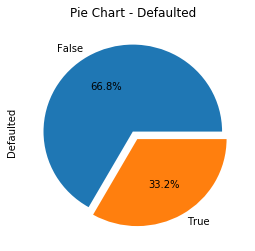

In [3]:
def plot_target(df, target):
    df = df.copy()
    
    # convert target variable
    #df[target].replace([True,False],[1,0],inplace=True)
    
    # plot
    plt.figure(figsize=[4,4])
    df[target].value_counts().plot(kind='pie', autopct='%1.1f%%', explode = [0,0.1])
    plt.title('Pie Chart - ' + target)
    plt.show()

plot_target(data, 'Defaulted')

In [7]:
# list of variables containing missing data
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 1]

data[vars_with_na].isnull().mean().sort_values(ascending=False)

CreditScoreEsEquifaxRisk             0.794928
DefaultDate                          0.667586
PreviousScore                        0.078304
HomeOwnershipType                    0.048358
EmploymentDurationCurrentEmployer    0.024824
EmploymentPosition                   0.013898
City                                 0.006842
EmploymentStatus                     0.006519
OccupationArea                       0.002901
WorkExperience                       0.001719
VerificationType                     0.001469
MaritalStatus                        0.001469
Gender                               0.001469
Education                            0.001469
DebtToIncome                         0.001469
dtype: float64

**We can already see potential columns that won't add any additional information to our model:**
- ID - An ID column has no predictive power
- Status - A column that is provides the same information as default variable
- CreditScoreEsEquifaxRisk - A column with previous RateScore and with 80% missing data
- DefaultDate - A column with the date when the default started but also with 67% of missing data

In [5]:
vars_to_exclude = ['ID', 'Status', 'CreditScoreEsEquifaxRisk','DefaultDate']

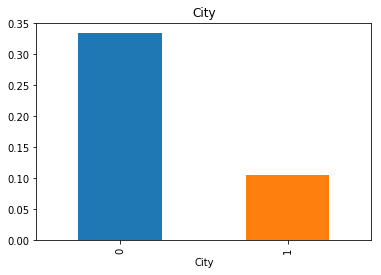

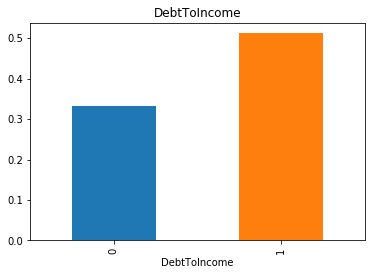

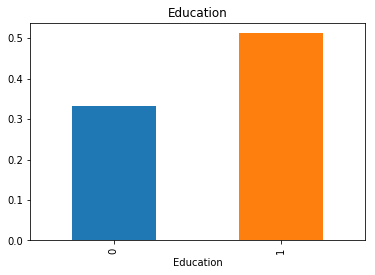

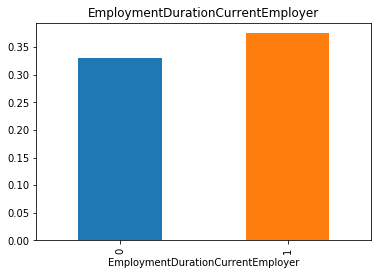

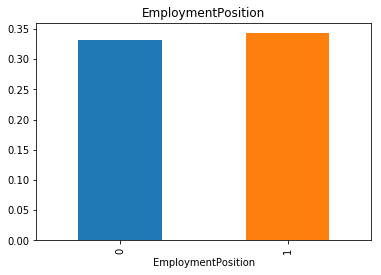

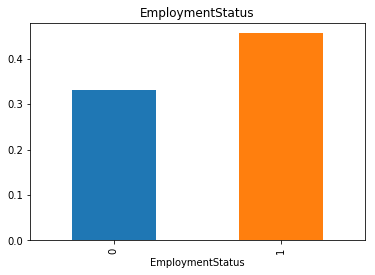

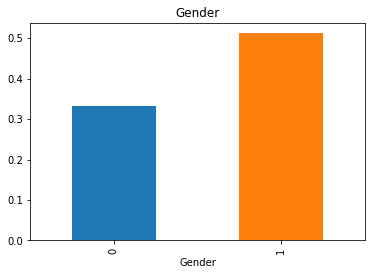

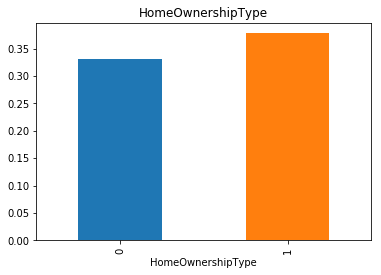

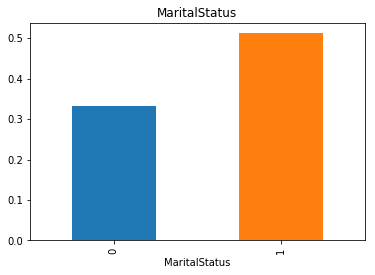

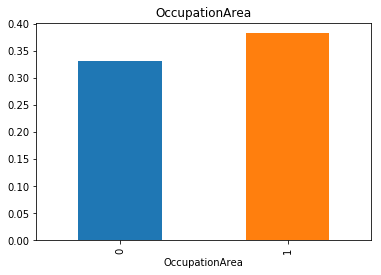

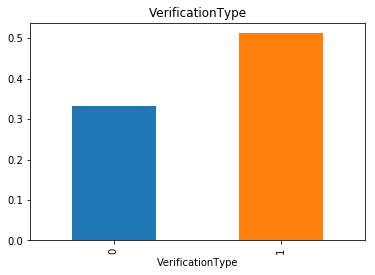

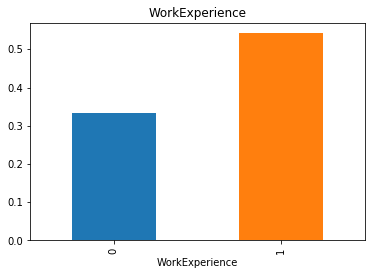

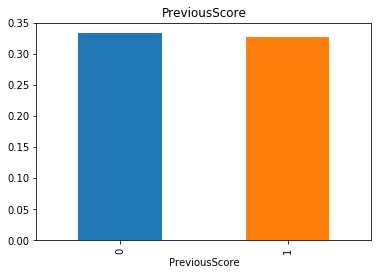

In [6]:
def analyse_na_value(df, var):
    df = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    df['Defaulted'].replace([True,False],[1,0],inplace=True)
    
    # let's calculate the mean SalePrice where the information is missing or present
    df.groupby(var)['Defaulted'].mean().plot.bar()
    plt.title(var)
    plt.show()

for var in [var_ for var_ in vars_with_na if var_ not in vars_to_exclude]:
    analyse_na_value(data, var)

**We can see that the missing information for those variables might have a important predictive power. Which is the case of:**
- City
- DebtToIncome
- Education
- EmploymentStatus
- Gender
- Marital Status
- Verification Type
- Work Experience

### Temporal Variables

In [7]:
temp_variables = ['DateOfBirth', 'LoanDate']

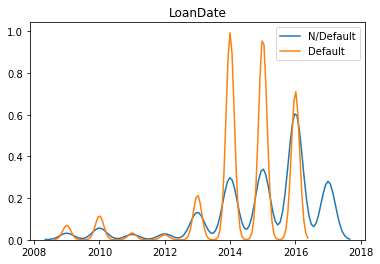

In [8]:
def analyze_temp_variables(df, var):
    df = df.copy()
    
    # convert object to datetime
    df[var] = pd.to_datetime(data[var])
    
    # convert date to age
    df[var] = pd.DatetimeIndex(df[var]).year
    
    #plot bivariate analysis
    sns.kdeplot(df.loc[df['Defaulted']==0, var], label = 'N/Default')
    sns.kdeplot(df.loc[df['Defaulted']==1, var], label = 'Default')
    plt.title(var)
    plt.show()

analyze_temp_variables(data, temp_variables[1])

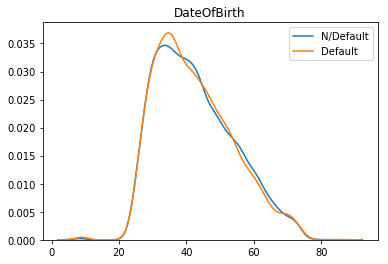

In [9]:
def analyze_temp_variables(df, var):
    df = df.copy()
    
    # convert object to datetime
    df[var] = pd.to_datetime(data[var])
    
    # convert date to age
    df[var] = 2019 - pd.DatetimeIndex(df[var]).year
    
    #plot bivariate analysis
    sns.kdeplot(df.loc[df['Defaulted']==0, var], label = 'N/Default')
    sns.kdeplot(df.loc[df['Defaulted']==1, var], label = 'Default')
    plt.title(var)
    plt.show()

analyze_temp_variables(data, temp_variables[0])

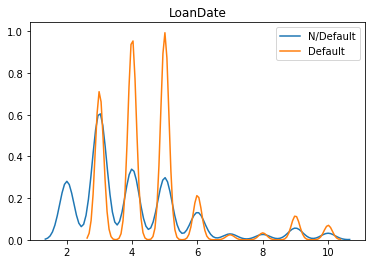

In [10]:
analyze_temp_variables(data, temp_variables[1])

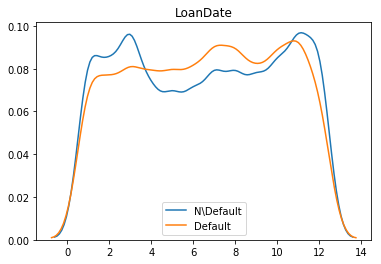

In [11]:
def analyze_temp_variables(df, var):
    df = df.copy()
    
    # convert object to datetime
    df[var] = pd.to_datetime(data[var])
    
    # convert date to age
    df[var] = pd.DatetimeIndex(df[var]).month
    
    #plot
    sns.kdeplot(df.loc[df['Defaulted']==0, var], label = 'N\Default')
    sns.kdeplot(df.loc[df['Defaulted']==1, var], label = 'Default')
    plt.title(var)
    plt.show()

analyze_temp_variables(data, temp_variables[1])

### Numerical Variables

In [12]:
num_vars = [var for var in data.columns if data[var].dtypes not in ['O', 'bool'] 
            and var not in vars_to_exclude + ['Defaulted']]

print(data[num_vars].shape)
data[num_vars].head()

(27917, 19)


,Amount,ApplicationSignedHour,ApplicationSignedWeekday,DebtToIncome,Education,EmploymentStatus,ExistingLiabilities,Gender,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeTotal,Interest rate (APR),LoanDuration,MaritalStatus,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,PreviousScore
0,5000.0,12,4,51.52,4.0,3.0,9,0.0,6.0,1000.0,1000.0,24.52,60,4.0,1,8.0,0,1.0,0.0957
1,530.0,14,2,30.32,4.0,3.0,7,1.0,9.0,633.0,633.0,25.68,60,1.0,0,1.0,2,4.0,0.1034
2,5500.0,22,4,29.57,4.0,5.0,1,0.0,1.0,550.0,550.0,21.62,60,4.0,0,13.0,2,3.0,0.0772
3,6900.0,15,3,45.75,2.0,3.0,10,0.0,1.0,833.0,833.0,21.63,60,3.0,1,19.0,7,4.0,0.0773
4,2655.0,10,3,25.40,4.0,3.0,6,1.0,4.0,341.0,341.0,26.88,60,3.0,0,17.0,2,4.0,0.1898


#### Discrete Variables 

In [13]:
disc_vars = [var for var in num_vars if len(data[var].unique())<=25]

print(data[disc_vars].shape)
data[disc_vars].head()

(27917, 11)


,ApplicationSignedHour,ApplicationSignedWeekday,Education,EmploymentStatus,Gender,HomeOwnershipType,MaritalStatus,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType
0,12,4,4.0,3.0,0.0,6.0,4.0,1,8.0,0,1.0
1,14,2,4.0,3.0,1.0,9.0,1.0,0,1.0,2,4.0
2,22,4,4.0,5.0,0.0,1.0,4.0,0,13.0,2,3.0
3,15,3,2.0,3.0,0.0,1.0,3.0,1,19.0,7,4.0
4,10,3,4.0,3.0,1.0,4.0,3.0,0,17.0,2,4.0


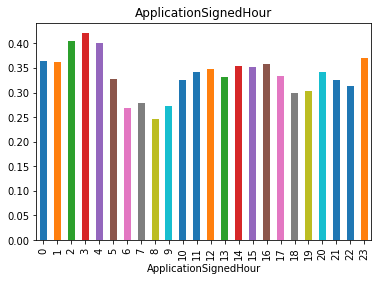

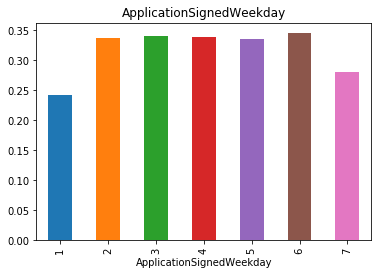

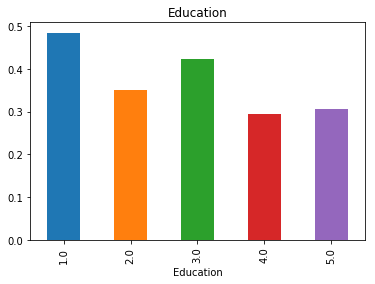

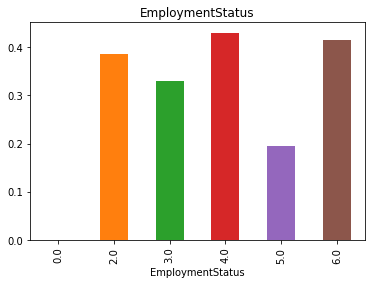

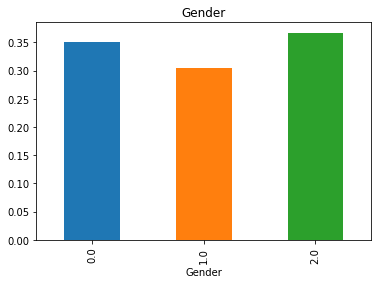

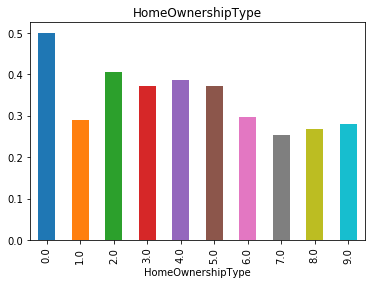

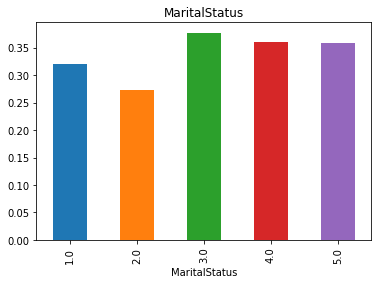

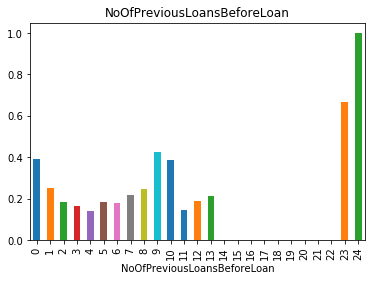

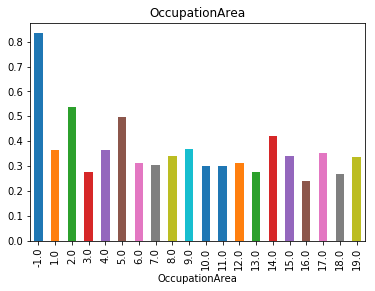

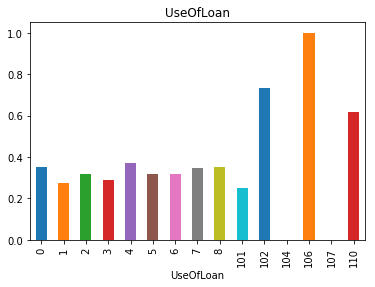

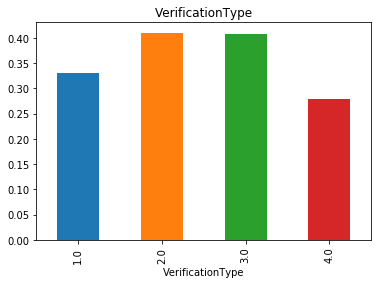

In [14]:
def analyze_discrete_vars(df, var):
    df = df.copy()
    
    # replace boolean for binary value
    df['Defaulted'].replace([True,False],[1,0],inplace=True)
    
    # plot
    df.groupby(var)['Defaulted'].mean().plot.bar()
    #sns.barplot(x = var, y = 'Defaulted', data = data)
    plt.title(var)
    plt.show()

for var in disc_vars:
    analyze_discrete_vars(data, var)

#### Continuos Variables

In [15]:
cont_vars = [var for var in num_vars if var not in disc_vars]

print(data[cont_vars].shape)
data[cont_vars].head()

(27917, 8)


,Amount,DebtToIncome,ExistingLiabilities,IncomeFromPrincipalEmployer,IncomeTotal,Interest rate (APR),LoanDuration,PreviousScore
0,5000.0,51.52,9,1000.0,1000.0,24.52,60,0.0957
1,530.0,30.32,7,633.0,633.0,25.68,60,0.1034
2,5500.0,29.57,1,550.0,550.0,21.62,60,0.0772
3,6900.0,45.75,10,833.0,833.0,21.63,60,0.0773
4,2655.0,25.40,6,341.0,341.0,26.88,60,0.1898


**Distribution of features**

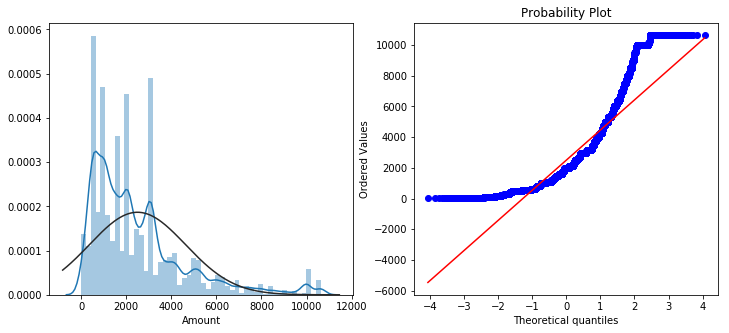

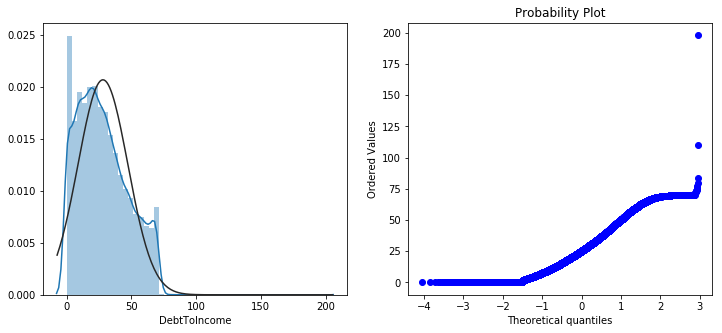

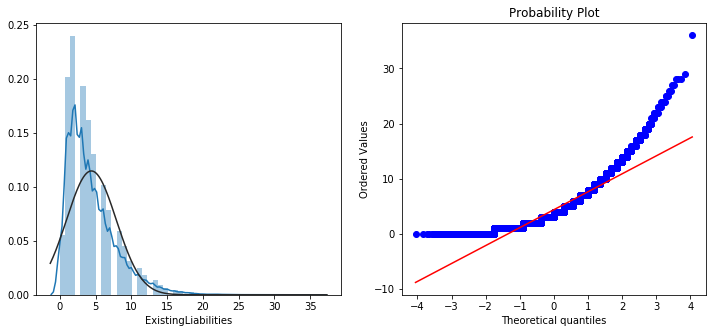

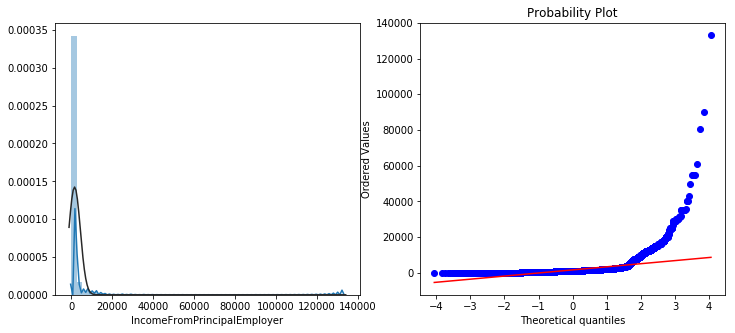

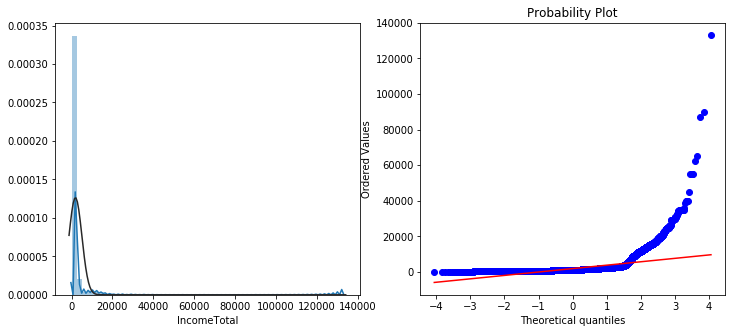

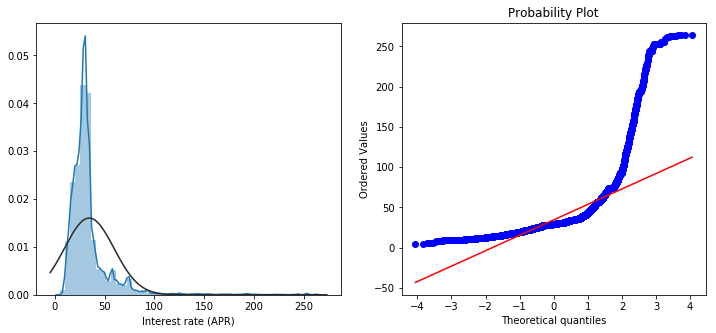

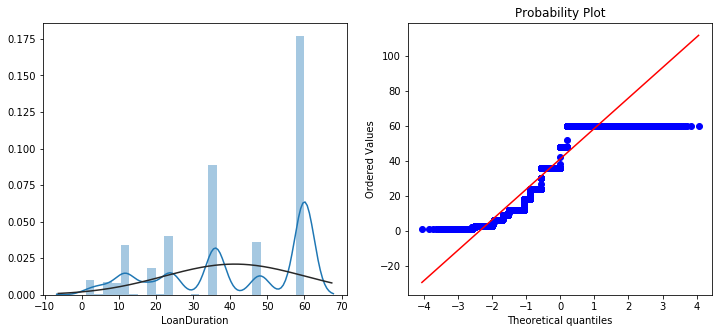

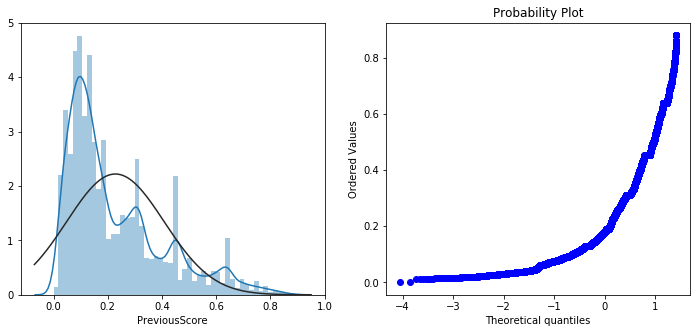

In [16]:
def analyze_cont_vars(df, var):
    df = df.copy()
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    #df[var].hist(bins = 20)
    sns.distplot(df[var].dropna(), fit = stats.norm)

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)

    plt.show()

for var in cont_vars:
    analyze_cont_vars(data, var)

**Distribution of Features with Exponential transformation**

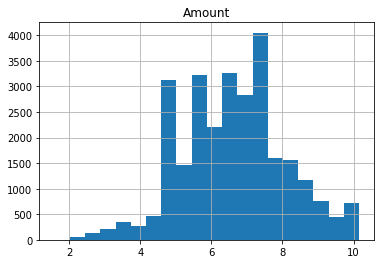

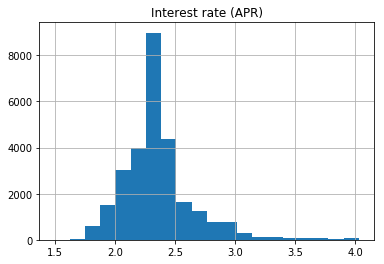

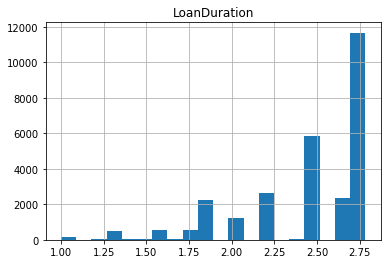

In [17]:
def analyze_cont_vars(df, var):
    df = df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
        # exponential tranformation
        #df[var] = np.log(df[var])
        df[var]= df[var]**(1/4)
        
        # plot
        df[var].hist(bins = 20)
        #sns.kdeplot(df.loc[df['Defaulted']==1, var], label = 'Default')
        #sns.kdeplot(df.loc[df['Defaulted']==0, var], label = 'Not Default')
        plt.title(var)
        plt.show()

for var in cont_vars:
    analyze_cont_vars(data, var)

**Outliers**

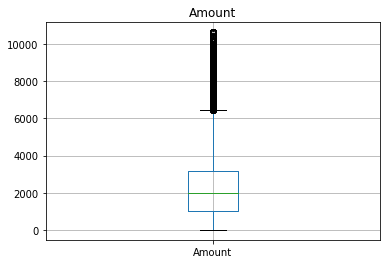

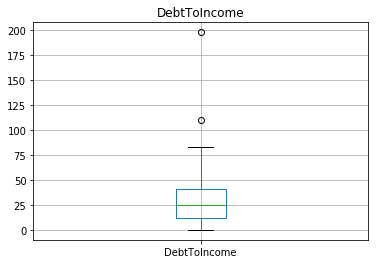

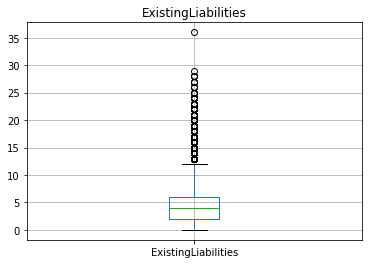

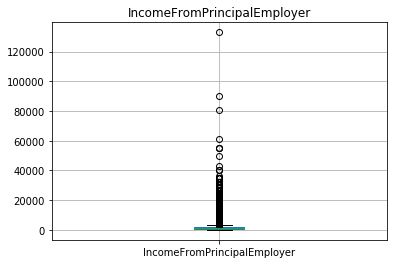

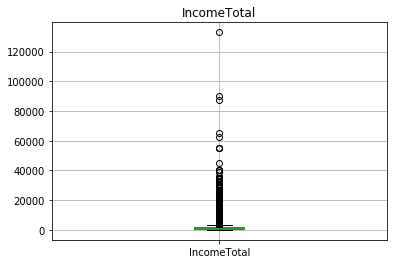

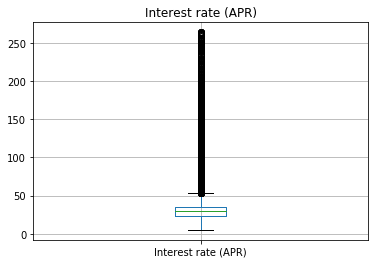

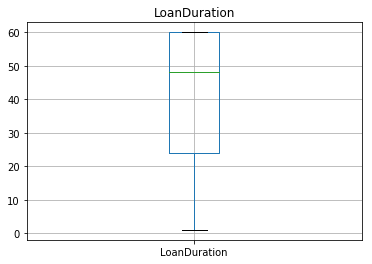

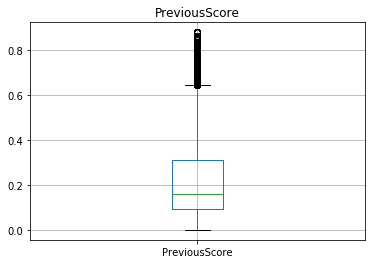

In [18]:
def analyze_cont_vars(df, var):
    df = df.copy()
    
    df.boxplot(column = var)
    #sns.boxplot(y = var, data = data)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyze_cont_vars(data, var)

**Bivariate Analysis**

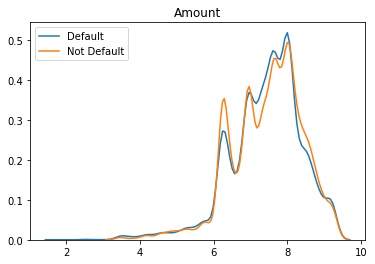

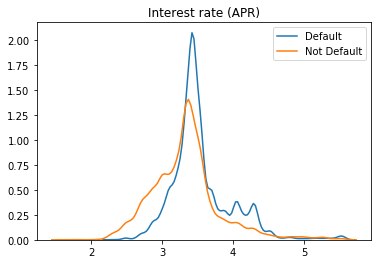

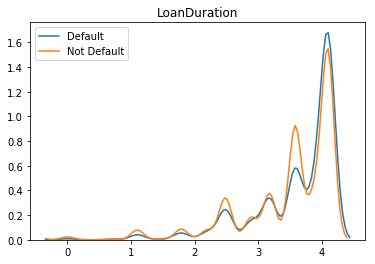

In [19]:
def analyze_cont_vars(df, var):
    df = df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        sns.kdeplot(df.loc[df['Defaulted']==1, var], label = 'Default')
        sns.kdeplot(df.loc[df['Defaulted']==0, var], label = 'Not Default')
        plt.title(var)
        plt.show()

for var in cont_vars:
    analyze_cont_vars(data, var)

### Categorical Variables

In [20]:
cat_vars = [var for var in data.columns if data[var].dtypes == 'O' and var not in temp_variables + vars_to_exclude]

print(data[cat_vars].shape)
data[cat_vars].head()

(27917, 5)


,City,Country,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience
0,AESPA,EE,UpTo5Years,Worker,15To25Years
1,PÄRNU,EE,MoreThan5Years,SpecialistOfficeWorker,15To25Years
2,TALLINN,EE,MoreThan5Years,Owner,MoreThan25Years
3,KEHTNA,EE,MoreThan5Years,Worker,5To10Years
4,KIVIÕLI,EE,MoreThan5Years,Worker,5To10Years


**Cardinality**

In [21]:
for var in cat_vars:
    print(var, len(data[var].unique()), ' categories')

City 4529  categories
Country 4  categories
EmploymentDurationCurrentEmployer 8  categories
EmploymentPosition 2768  categories
WorkExperience 7  categories


**High Cardinality**

Features with several labels need to be treated carefully or dropped for the following reasons:
- Featutes with many labels tend to dominate over features with lower labels, mainly on tree alghoritms
- Since there's too many labels, when splitting the data between train and test set, there's the risk of training set not contain all possible labels, and thus the train model won't be able to treat unknown labels
- Many labels tend to introduce noise and cause overfit in the model

One way to treat them is mapped them in a way it contains less labels.

Another option when there is no way of new mapping, is to consider for example to top 10 values and consider all the remaining ones as 'others'

In [22]:
print(data.EmploymentPosition.unique().tolist())
print()
print(data.City.unique().tolist())

['Worker', 'SpecialistOfficeWorker', 'Owner', 'Pensioner', 'Executive', 'MiddleManager', 'SuperiorSpecialist', 'Housewife', 'Unemployed', 'Tegevjuht', 'müüja', 'laadurijuht', 'kokk', 'õpetaja', 'Õpetaja', 'tööline', nan, 'klienditeenindaja', 'puhastus teenindaja', 'Müügikontsultant', 'Vabakutseline', 'IT Manager', 'Laotööline', 'õpilane', 'objektijuht', 'Kokk', 'lapsega kodus', 'Transporttööline', 'vabakutseline it spetsialist', 'kliendihaldur ja nõustja', 'praegu lapsehoolduspuhkusel', 'Autolukksepp', 'Objektijuht', 'osakonnajuhataja', 'üliõpilane', 'vanemspetsialist', 'vabakutseline it spetsialist/töövõimetus pensionär', 'õmbleja', 'Lasteaia õpetaja', 'Auto remondi lukksepp', 'operaator', 'Õppealajuhataja', 'pagar', 'Üliõpilane', 'personalitöötaja', 'tallitaja', 'Müügispetsialist.', 'Reisikonsultant', 'Klienditeenindaja', 'spetsialist', 'Tarkvaraarendaja', 'Insener', 'Suurkliendihaldur', 'pearaamatupidaja', 'Kauplus, klienditeenindaja', 'Konsultant', 'direktori asetäitja', 'inkassosp

In [23]:
EmploymentPosition_top10 = [x for x in data['EmploymentPosition'].value_counts().head(7).index]
City_top10 = [x for x in data['City'].value_counts().head(10).index]
print(EmploymentPosition_top10)
City_top10

['Worker', 'SpecialistOfficeWorker', 'SuperiorSpecialist', 'MiddleManager', 'Owner', 'Executive', 'Pensioner']


['TALLINN',
 'TARTU',
 'Tallinn',
 'HELSINKI',
 'MADRID',
 'VANTAA',
 'PÄRNU',
 'BARCELONA',
 'ESPOO',
 'NARVA']

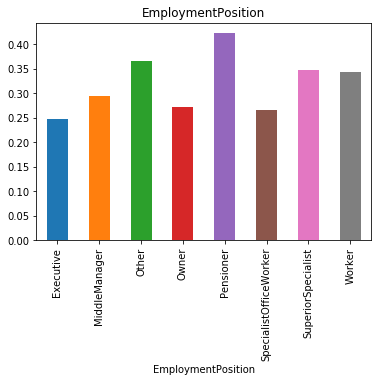

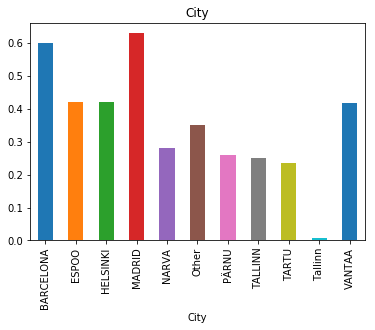

In [24]:
def analyse_cat_vars(df, var, top_vars):
    df = df.copy()
    
    # new var
    df[var] = [x if x in top_vars else 'Other' for x in data[var]]
    
    # plot
    df.groupby(var)['Defaulted'].mean().plot.bar()
    #sns.barplot(x = 'EmploymentPosition', y = 'Defaulted', data = data)
    plt.title(var)
    plt.show()

for var, top in zip(['EmploymentPosition', 'City'], [EmploymentPosition_top10,City_top10]):
    analyse_cat_vars(data, var, top)

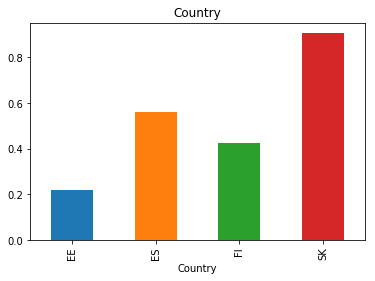

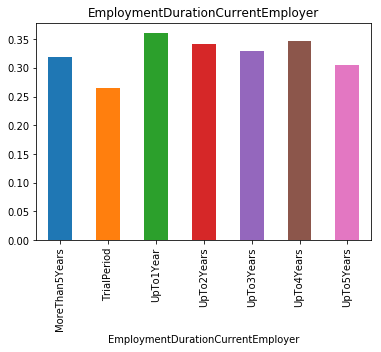

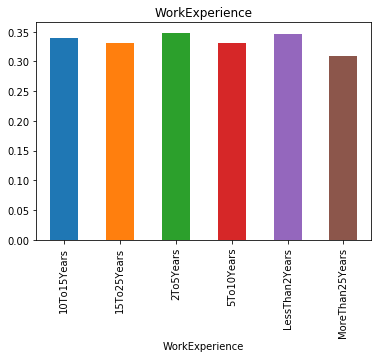

In [25]:
def analyse_cat_vars(df, var):
    df = df.copy()
    
    df.groupby(var)['Defaulted'].mean().plot.bar()
    plt.title(var)
    plt.show()

for var in [row for row in cat_vars if row not in ['EmploymentPosition', 'City']]:
    analyse_cat_vars(data, var)

**Rare Values**

There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5% may cause over-fitting in trees.

Rare observations can be re-categorised by:

- Replacing the rare label by most frequent label
- Grouping the observations that show rare labels into a unique category (with a new label like 'Rare', or 'Other')

If the dominant observation accounts for more that 90% of the observation, engineering that rare label is not a option. One need to choose between keeping the feature as it is (if it's a really important feature), or drop it. Example:

Street

| Obs  | Perc    |   |   |   |
|------|---------|---|---|---|
| Grvl | 0.00411 |   |   |   |
| Pave | 0.99589 |   |   |   |

When the variable has only a few categories, then perhaps it makes no sense to re-categorise the rare labels into something else, like merging the rare label with the most common one. Yet one should compare the distribution of the rare observation with the the one with most common values, to ensure they provide the same information to the model. If not, one should not engineer the feature.

In case of engineering the feature, one should the improvement in the model. If no improvement is achieved, one should not consider this transformation to avoid anymore steps in pipeline.

MasVnrType

| Obs     | Perc     |   |   |   |
|---------|----------|---|---|---|
| BrkCmn  | 0.010274 |   |   |   |
| BrkFace | 0.304795 |   |   |   |
| None    | 0.591781 |   |   |   |
|Stone | 0.087671

In cases with high cardinality, observations with less than 5% should be replaced by label "rare". Important to state that this transformation should take place in the training set, and then applied to the test set.


In [26]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['Defaulted'].count() / len(df)
    return tmp[tmp<rare_perc]

for var in [row for row in cat_vars if row not in ['EmploymentPosition', 'City']]:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Country
SK    0.008776
Name: Defaulted, dtype: float64

Series([], Name: Defaulted, dtype: float64)

Series([], Name: Defaulted, dtype: float64)



### Correlation Map

In [27]:
data.head()

,ID,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,City,Country,CreditScoreEsEquifaxRisk,DateOfBirth,DebtToIncome,Education,EmploymentDurationCurrentEmployer,EmploymentPosition,EmploymentStatus,ExistingLiabilities,Gender,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeTotal,Interest rate (APR),LoanDate,LoanDuration,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted,DefaultDate
0,0,Current,5000.0,12,4,AESPA,EE,NaN,21/11/1975,51.52,4.0,UpTo5Years,Worker,3.0,9,0.0,6.0,1000.0,1000.0,24.52,05/05/2015,60,4.0,False,1,8.0,0,1.0,15To25Years,0.0957,False,NaN
1,2,Repaid,530.0,14,2,PÄRNU,EE,NaN,25/10/1969,30.32,4.0,MoreThan5Years,SpecialistOfficeWorker,3.0,7,1.0,9.0,633.0,633.0,25.68,19/10/2015,60,1.0,True,0,1.0,2,4.0,15To25Years,0.1034,False,NaN
2,3,Current,5500.0,22,4,TALLINN,EE,NaN,22/11/1965,29.57,4.0,MoreThan5Years,Owner,5.0,1,0.0,1.0,550.0,550.0,21.62,02/09/2015,60,4.0,True,0,13.0,2,3.0,MoreThan25Years,0.0772,False,NaN
3,4,Repaid,6900.0,15,3,KEHTNA,EE,NaN,05/12/1983,45.75,2.0,MoreThan5Years,Worker,3.0,10,0.0,1.0,833.0,833.0,21.63,20/05/2015,60,3.0,False,1,19.0,7,4.0,5To10Years,0.0773,False,NaN
4,5,Current,2655.0,10,3,KIVIÕLI,EE,NaN,13/07/1980,25.40,4.0,MoreThan5Years,Worker,3.0,6,1.0,4.0,341.0,341.0,26.88,29/12/2015,60,3.0,True,0,17.0,2,4.0,5To10Years,0.1898,False,NaN


### Feature Engineering Pipeline must include:
- Replace variable Defaulted to 1, 0
- Replace variable NewCreditCustomer to 1, 0
- Drop variables ['ID', 'Status', 'CreditScoreEsEquifaxRisk','DefaultDate', 'EmploymentPosition','City']
- Create new binary variables for columns with NA
- Convert variables ['Education','EmploymentStatus','Gender','HomeOwnershipType','MaritalStatus', 'VerificationType'] from float to int
- Apply log to numerical variables to ensure normal distribution (eventually)
- Convert DateOfBirth to Age and extract month from LoanDate
- Convert strings to numbers